In [1]:
import frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Error: Could not import pydca. Please make sure it is installed and available in your system. No module named 'pydca'


In [2]:
frustration_type_palette={"Neutral":"gray","Frustrated":"red","Minimally_Frustrated":"green"}

In [3]:
def identify_frustration_type(x):
    if x>.78:
        frustration_type="Minimally_Frustrated"
    elif x<-1:
        frustration_type="Frustrated"
    else:
        frustration_type="Neutral"
    return frustration_type

# Measure Frustration of Complete PDB

In [30]:
structure=frustratometer.Structure.full_pdb('./data/1r69.pdb',"A")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=9.5)

@> 518 atoms and 1 coordinate set(s) were parsed in 0.02s.


@> 518 atoms and 1 coordinate set(s) were parsed in 0.01s.


Text(0.5, 0, 'Residue i')

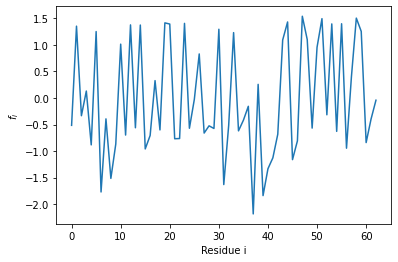

In [35]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))
plt.ylabel("$f_{i}$"); plt.xlabel("Residue i")

In [32]:
print(AWSEM_model.native_energy())

-260.22832170330156


### Single Residue Frustration

In [33]:
AWSEM_model.view_single_frustration(structure)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

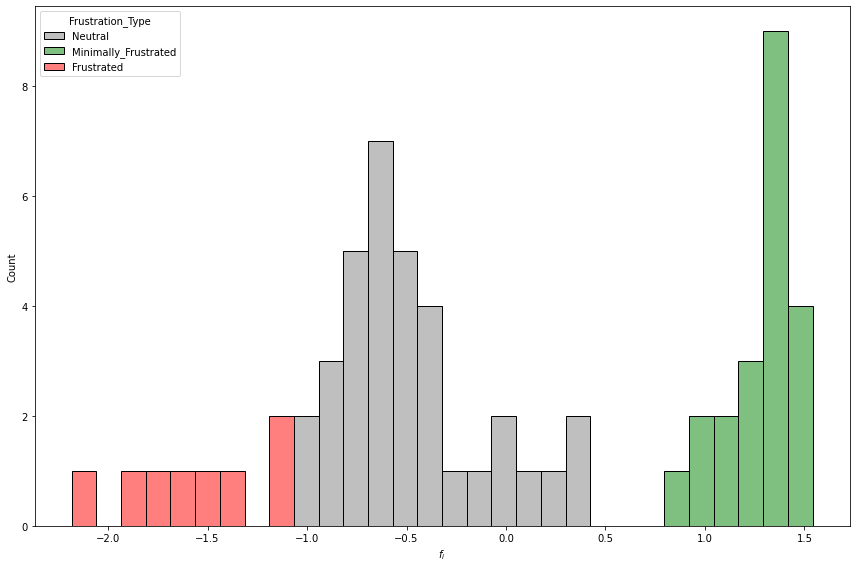

In [34]:
frustration_values=AWSEM_model.frustration(kind="singleresidue")

single_residue_frustration_dataframe=pd.DataFrame(data=frustration_values,columns=["f_i"])
single_residue_frustration_dataframe["Frustration_Type"]=single_residue_frustration_dataframe["f_i"].apply(lambda x: identify_frustration_type(x))


plt.figure(figsize=(12,8))

sns.histplot(data=single_residue_frustration_dataframe,x="f_i",hue="Frustration_Type",bins=30,palette=frustration_type_palette)
plt.xlabel("$f_{i}$")
plt.tight_layout()

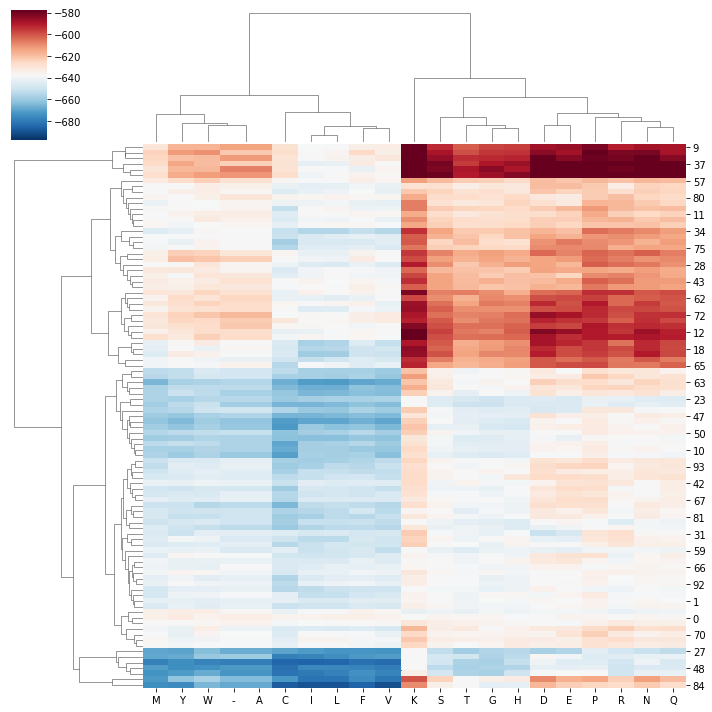

In [9]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

### Mutational Frustration

In [12]:
# AWSEM_model.view_frustration_pair_distribution(kind="mutational")

<AxesSubplot:>

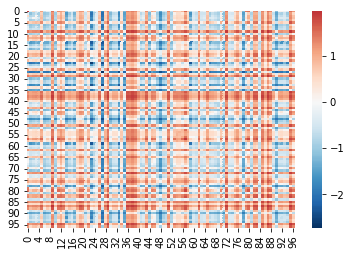

In [13]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

In [14]:
AWSEM_model.view_pair_frustration()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [27]:
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure.full_pdb('./data/1rnb.pdb',"A")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 957 atoms and 1 coordinate set(s) were parsed in 0.07s.


/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1347.
  PDBConstructionWarning,
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1360.
  PDBConstructionWarning,
@> 1008 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [28]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [18]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [19]:
structure=frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [20]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [21]:
structure=frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 3758 atoms and 1 coordinate set(s) were parsed in 0.04s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3762
  PDBConstructionWarning,
@> 3758 atoms and 1 coordinate set(s) were parsed in 0.04s.


In [22]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Trypsin (PDB: 3PTN)

In [23]:
structure=frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 3220 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3220 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [24]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## FGF (PDB: 1RG8)

In [25]:
structure=frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=8)

@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2250
  PDBConstructionWarning,
@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [26]:
AWSEM_model.view_pair_frustration()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol